In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\vikiss\\Documents\\great lakes\\New folder\\Case Study'

In [3]:
df = pd.read_csv('product_data.csv')

In [4]:
df.shape

(101335, 7)

In [5]:
df.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1,58.90,13.29,1,1,2,72.19
1,1,239.90,19.93,1,1,3,259.83
2,1,199.00,17.87,1,1,5,216.87
3,1,12.99,12.79,1,1,2,25.78
4,1,199.90,18.14,1,1,3,218.04


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101335 entries, 0 to 101334
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_item_id         101335 non-null  int64  
 1   price                 101335 non-null  float64
 2   freight_value         101335 non-null  float64
 3   payment_sequential    101335 non-null  int64  
 4   payment_type          101335 non-null  int64  
 5   payment_installments  101335 non-null  int64  
 6   payment_value         101335 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 5.4 MB


In [7]:
df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
count,101335.000000,101335.000000,101335.000000,101335.000000,101335.000000,101335.000000,101335.000000
mean,1.205280,79.818332,16.126716,1.089495,1.352040,2.671703,124.124508
std,0.715244,56.057932,5.943237,0.689100,0.652362,2.524321,124.418064
min,1.000000,0.850000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,35.990000,12.690000,1.000000,1.000000,1.000000,55.550000
50%,1.000000,63.900000,15.470000,1.000000,1.000000,1.000000,95.400000
75%,1.000000,109.900000,18.670000,1.000000,2.000000,3.000000,155.840000
max,21.000000,270.000000,36.000000,26.000000,4.000000,24.000000,3195.730000


In [8]:
df[df['freight_value'] == 0]['payment_sequential'].value_counts()

1    382
2      3
6      1
5      1
4      1
3      1
Name: payment_sequential, dtype: int64

In [9]:
df.isnull().sum()

order_item_id           0
price                   0
freight_value           0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

There are no null values in the dataset

# EDA

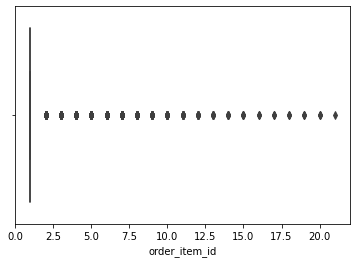

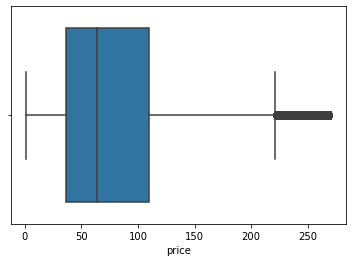

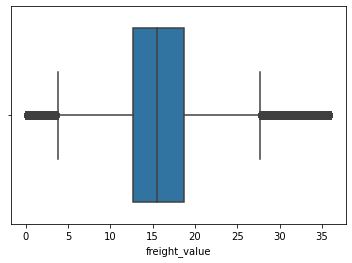

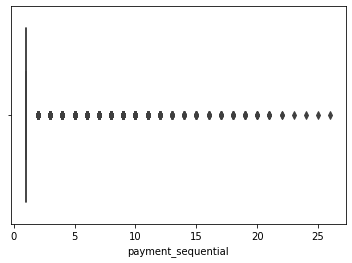

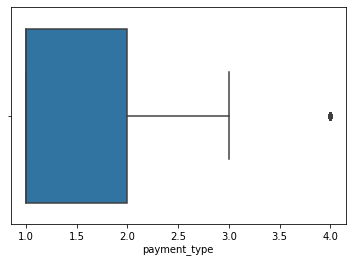

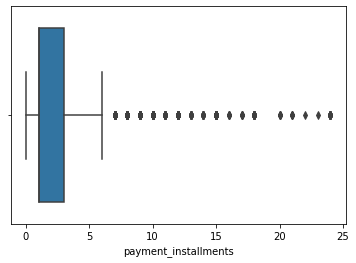

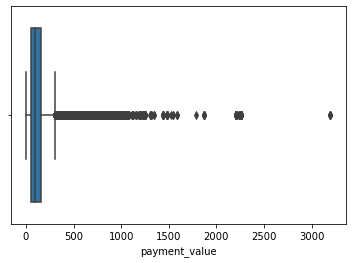

In [10]:
for i in df.columns:
  sns.boxplot(df[i])
  plt.show()

#There are outliers in the dataset so we need to treat it

# MULTIVARIATE ANALYSIS

<AxesSubplot:>

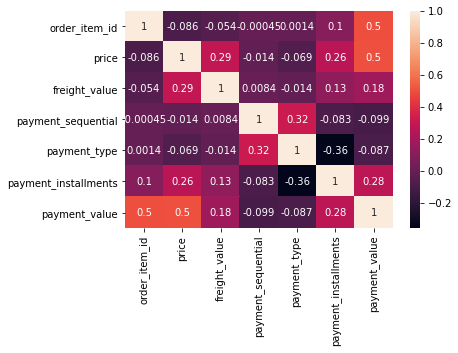

In [11]:
sns.heatmap(df.corr(),annot=True)

# OUTLIER TREATMENT

In [14]:
numerical_cols = df[['price','payment_installments','freight_value','payment_value']]
for col in numerical_cols.columns:
  q1 = numerical_cols[col].quantile(0.25)
  q3 = numerical_cols[col].quantile(0.75)
  iqr = q3-q1
  LL = q1 - (1.5*iqr)
  UL = q3 + (1.5*iqr)
  for i in df[col].index:
    if df.loc[i,col] < LL :
      df.loc[i,col] = LL
    elif df.loc[i,col] > UL :
      df.loc[i,col] = UL

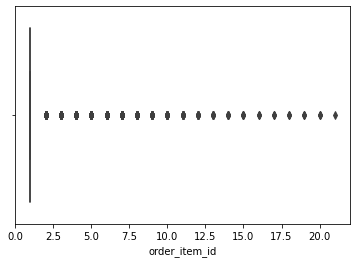

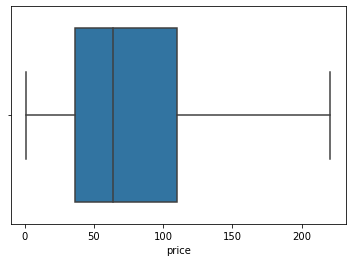

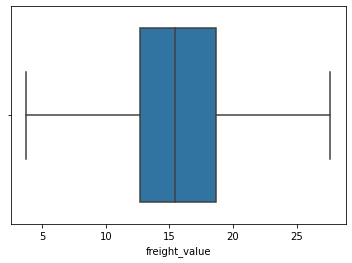

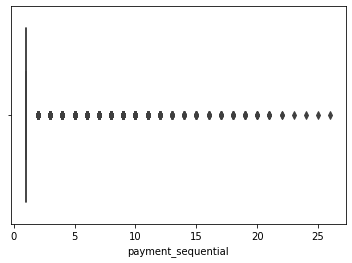

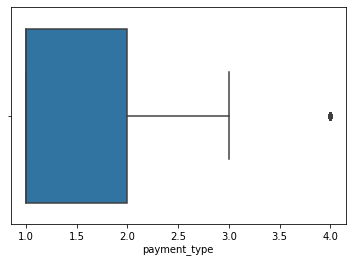

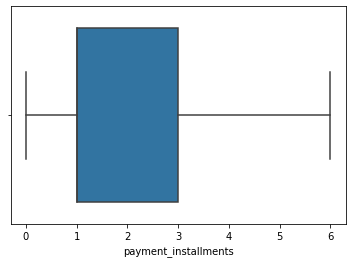

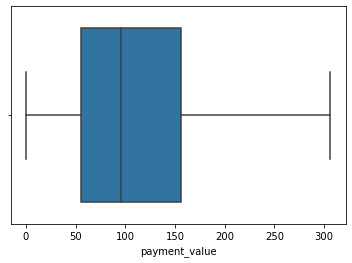

In [15]:
for i in df.columns:
  sns.boxplot(df[i])
  plt.show()

# Skewness

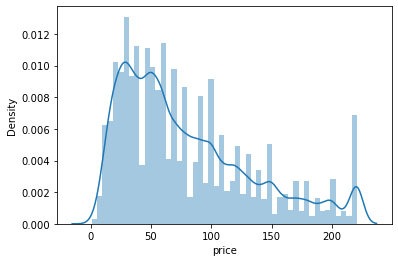

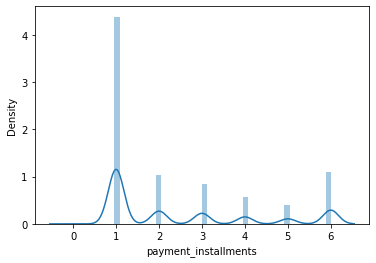

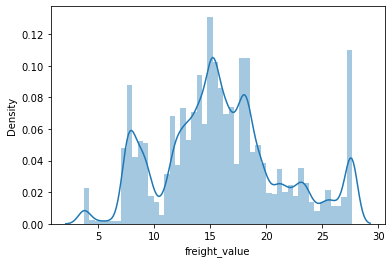

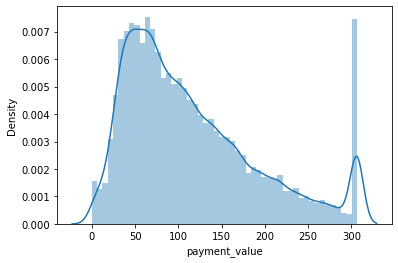

In [16]:
for i in numerical_cols:
  sns.distplot(df[i])
  plt.show()

In [18]:
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Linear regression model

In [19]:
X=df.drop(['price'],axis=1)
Y=df['price']
Xc = sm.add_constant(X)

In [21]:
Base_model = sm.OLS(Y, Xc).fit()
Base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                 2.811e+04
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:07:40   Log-Likelihood:            -4.9898e+05
No. Observations:              101335   AIC:                         9.980e+05
Df Residuals:                  101328   BIC:                         9.980e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   24.1162      0.485     49.685      0.000      23.165      25.068
order_item_id          -28.6713      0.159   -180.183      0.000     -28.983     -28.359
freight_value            0.5948      0.020     29.184      0.000       0.555       0.635
payment_sequential       7.9428      0.162     49.065      0.000       7.625       8.260
payment_type             1.9680      0.185     10.629      0.000       1.605       2.331
payment_installments     0.7499      0.067     11.245      0.000       0.619       0.881
payment_value            0.5859      0.002    357.853      0.000       0.583       0.589
==============================================================================
Omnibus:                    14372.203   Durbin-Watson:                   1.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           206973.136
Skew:                           0.122   Prob(JB):                         0.00
Kurtosis:                       9.997   Cond. No.                         660.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
lr_pred=Base_model.predict(Xc)

In [27]:
lr_pred=Base_model.predict(Xc)
round(mean_squared_error(Y,lr_pred),2)

1107.99

In [28]:
round(np.sqrt(mean_squared_error(Y,lr_pred)),2)

33.29

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,StackingRegressor,VotingRegressor

In [31]:
# Multi-Collinearity
vif = pd.DataFrame()
vif['Factor'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features'] = df.columns
vif.sort_values(by = 'Factor',ascending=False)

,Factor,Features
6,10.347399,payment_value
1,8.129854,price
2,7.619728,freight_value
4,5.446563,payment_type
0,5.215253,order_item_id
3,3.979896,payment_sequential
5,3.202611,payment_installments


In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=7)

In [35]:

lr = LinearRegression()
base_model = lr.fit(xtrain,ytrain)
ypred = base_model.predict(xtest)

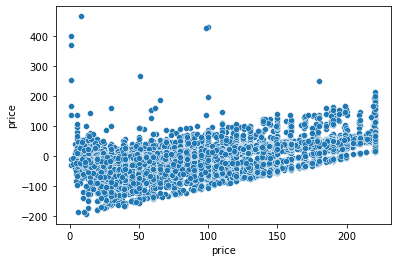

In [36]:
residual = ytest-ypred
sns.scatterplot(x = ytest,y = r)
plt.show()

In [40]:
kf= KFold(n_splits=5,shuffle=True,random_state=7)
r2 = cross_val_score(estimator=lr,X=X,y=Y,scoring = 'r2',cv=kf)
r2_lr = np.mean(r2)
n = X.shape[0]
c = X.shape[1]
adj_r2_lr = 1 - ((1-r2_lr)*(n-1)/(n-c-1))
mse  = cross_val_score(estimator=lr,X=X,y=Y,scoring = 'neg_mean_squared_error',cv=c)
mse_lr = np.abs(np.mean(mse))
rmse_lr = np.sqrt(mse_lr)
print(r2_lr)
print(adj_r2_lr)
print(rmse_lr) 

0.6243812860140314
0.6243590442616638
33.33827332823365


In [ ]:
#Model 2

In [44]:
rf = RandomForestRegressor()
model2 = rf.fit(xtrain,ytrain)
ypred =  model2.predict(xtest)

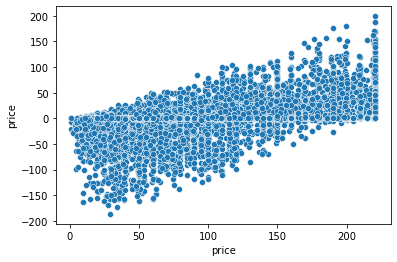

In [45]:
r = ytest-ypred
sns.scatterplot(x = ytest,y = r)
plt.show()

In [50]:
kf= KFold(n_splits=5,shuffle=True,random_state=7)
r2 = cross_val_score(estimator=rf,X=X,y=Y,scoring = 'r2',cv=kf)
r2_rf = np.mean(r2)
n = X.shape[0]
c = X.shape[1]
adj_r2_rf = 1 - ((1-r2_rf)*(n-1)/(n-c-1))
mse  = cross_val_score(estimator=rf,X=X,y=Y,scoring = 'neg_mean_squared_error',cv=c)
mse_rf = np.abs(np.mean(mse))
rmse_rf = np.sqrt(mse_rf)
print(r2_rf)
print(adj_r2_rf)
print(rmse_rf) 

0.8049727390492292
0.8049611907746584
24.41224294903658


# Conclusion

Random forest performs better results